# Simulating Bernoulli Processes
**Author:** Krittanon "Pond" Sirorattanakul (krittanon.pond@gmail.com) <br>
**Intial creation:** January 30th, 2021 <br>
**Last update:** January 31st, 2021

This jupyter notebook demonstrates how we can simulate Bernoulli processes and how do the results compare with the theories. This notebook is intended to be a teaching tool for anyone who might want to learn the topic. Please contact me if you discover a bug in my code or if you have some suggestions for things to be added to this notebook.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Specify parameters
n = 100     # number of observations
p = 0.2     # probability for a successful trial
m = 10000     # number of simulations

In [3]:
# Generate data (Bernoullie process follows binomial distribution with n=1)
data = []
for i in range(m):
  data.append(np.random.binomial(1, p, n))
data = np.array(data)

Let's first visualize an example of the simulated Bernoulli trials

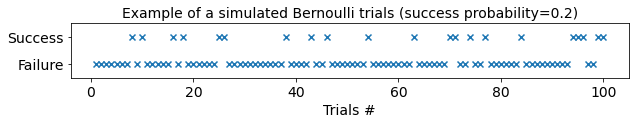

In [4]:
# Plot an example of the simulated Bernoulli trials
plt.figure(figsize=(10,1))
plt.scatter(np.array(range(n))+1,data[0],marker='x')
plt.xlabel('Trials #',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks([0,1],['Failure','Success'],fontsize=14)
plt.ylim([-0.5,1.5])
plt.title('Example of a simulated Bernoulli trials (success probability=' + str(p) + ')',fontsize=14)
plt.show()

We want to know how much does the results vary between different simulations. We start by plotting the distribution of total number of successes from different simulations.

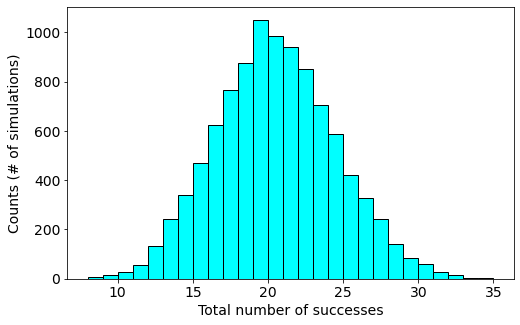

In [5]:
# Plot histogram of simulated results
counts = sum(data.T)
plt.figure(figsize=(8,5))
plt.hist(counts, bins=range(min(counts),max(counts)), facecolor='cyan', edgecolor='black')
plt.xlabel('Total number of successes',fontsize=14)
plt.ylabel('Counts (# of simulations)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Number of successes in n time slots
The number of successes ($S$) in $n$ time slots follow a binomial distribution. For a sufficiently large number of Bernoulli trials in each sequence, binomial distribution can be approximate with a Gaussian distribution.

$\mathbb{P}(S=k) = {n\choose k}p^k(1-p)^{n-k}p$

From this distribution, we can derive the following expected value and variance of $S$.

$\mathbb{E}[S] = np$

$var(S) = np(1-p)$

In [6]:
# Define a function to calculate binomial coefficient
def binomial(n, k):
  return math.factorial(n) / (math.factorial(n-k)*math.factorial(k))

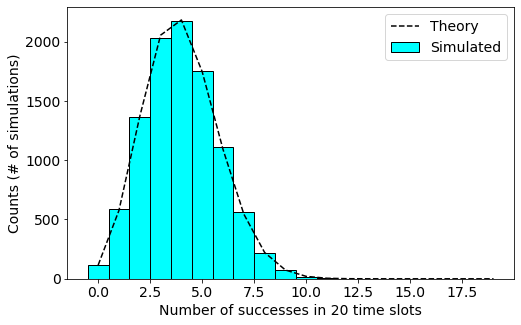

-----------------------------------------------
Expected value of trial # with first success (theory): 4.0000
Expected value of trial # with first success (simulated): 4.0068
-----------------------------------------------
Variances of trial # with first success (theory): 3.2000
Variances of trial # with first success (simulated): 3.2292


In [7]:
# Choose desired number of time slots
n_slots = 20    # Note that n_slots needs to be smaller than the total slots in the simulation, n

# Calculate number of sucesses in n_slots
S = sum(data.T[0:n_slots,:])
pred = np.array([m*binomial(n_slots,k)*(p**k)*(1-p)**(n_slots-k) for k in range(n_slots)])

# Plot number of sucesses in n_slots
plt.figure(figsize=(8,5))
plt.hist(S, bins=np.array(range(min(S),max(S)+1))-0.5, 
         facecolor='cyan', edgecolor='black', label='Simulated')
plt.plot(range(n_slots), pred, 'k--', label='Theory')
plt.xlabel('Number of successes in ' + str(n_slots) + ' time slots',fontsize=14)
plt.ylabel('Counts (# of simulations)',fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

print('-----------------------------------------------')
print('Expected value of trial # with first success (theory): ' + '%.4f' %(n_slots*p))
print('Expected value of trial # with first success (simulated): ' + '%.4f' %(np.average(S)))
print('-----------------------------------------------')
print('Variances of trial # with first success (theory): ' + '%.4f' %(n_slots*p*(1-p)))
print('Variances of trial # with first success (simulated): ' + '%.4f' %(np.std(S)**2))

## Time until first success
Now, we can plot time until the first success ($T_1$), defined as the trial number when the first success occurred. From theoretical analysis, the trial number with first success is governed by a geometric distribution

$\mathbb{P}(T_1=k) = (1-p)^{k-1}p$

From this distribution, we can derive the following expected value and variance of $T_1$.

$\mathbb{E}[T_1] = \frac{1}{p}$

$var(T_1) = \frac{1-p}{p^2}$

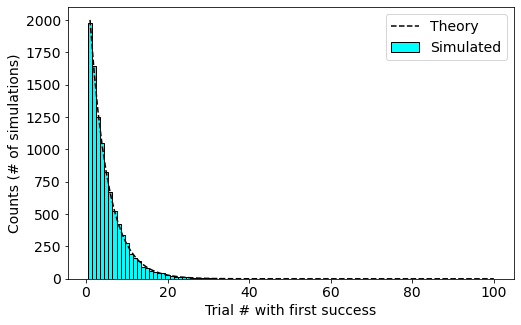

-----------------------------------------------
Expected value of trial # with first success (theory): 5.0000
Expected value of trial # with first success (simulated): 4.9677
-----------------------------------------------
Variances of trial # with first success (theory): 20.0000
Variances of trial # with first success (simulated): 19.9617


In [8]:
# Calculate time until the first success
t1 = []
for i in range(m):
  j = 0
  while (data[i,j]<1):
    j = j + 1
    if j==n:
      break
  t1.append(j+1)

# Plot time until the first success
plt.figure(figsize=(8,5))
plt.hist(t1, bins=np.array(range(min(t1),max(t1)+1))-0.5, 
         facecolor='cyan', edgecolor='black', label='Simulated')
plt.plot(np.array(range(n))+1, m*p*(1-p)**(np.array(range(n))), 'k--', label='Theory')
plt.xlabel('Trial # with first success',fontsize=14)
plt.ylabel('Counts (# of simulations)',fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

print('-----------------------------------------------')
print('Expected value of trial # with first success (theory): ' + '%.4f' %(1/p))
print('Expected value of trial # with first success (simulated): ' + '%.4f' %(np.average(t1)))
print('-----------------------------------------------')
print('Variances of trial # with first success (theory): ' + '%.4f' %((1-p)/p**2))
print('Variances of trial # with first success (simulated): ' + '%.4f' %(np.std(t1)**2))

## Time until kth success
Now, we can plot time until the kth success ($Y_k = T_1 + T_2 + ... + T_k$), defined as the trial number when the kth success occurred. From theoretical analysis, the trial number with first success is governed by a binomial distribution

$\mathbb{P}(Y_k=t) = {t-1\choose k-1}p^k(1-p)^{t-k}$, for $t=k,k+1,...$

From this distribution, we can derive the following expected value and variance of $T_1$.

$\mathbb{E}[Y_k] = \frac{k}{p}$

$var(T_1) = \frac{k(1-p)}{p^2}$

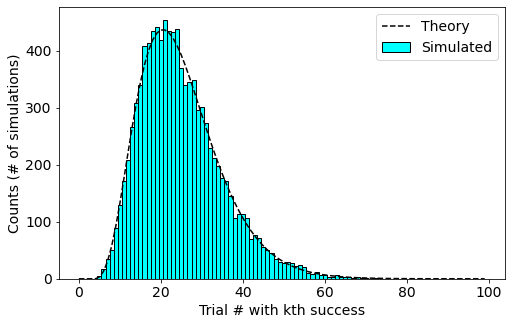

-----------------------------------------------
Expected value of trial # with kth success (theory): 25.0000
Expected value of trial # with kth success (simulated): 24.9259
-----------------------------------------------
Variances of trial # with kth success (theory): 100.0000
Variances of trial # with kth success (simulated): 99.5992


In [9]:
# Choose a value of k
k = 5

# Calculate time until the first success
yk = []
for i in range(m):
  j = 0
  count = 0
  while count<k and j<n:
    if data[i,j] == 1:
      count = count + 1
    j = j + 1
  yk.append(j)

# Calculate predicted probability of time until the first success
pred = np.append(np.zeros(k),np.array([m*binomial(t-1,k-1)*(p**k)*(1-p)**(t-k) for t in range(k,n)]))

# Plot time until the first success
plt.figure(figsize=(8,5))
plt.hist(yk, bins=np.array(range(min(yk),max(yk)+1))-0.5, 
         facecolor='cyan', edgecolor='black', label='Simulated')
plt.plot(range(n), pred, 'k--', label='Theory')
plt.xlabel('Trial # with kth success',fontsize=14)
plt.ylabel('Counts (# of simulations)',fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

print('-----------------------------------------------')
print('Expected value of trial # with kth success (theory): ' + '%.4f' %(k/p))
print('Expected value of trial # with kth success (simulated): ' + '%.4f' %(np.average(yk)))
print('-----------------------------------------------')
print('Variances of trial # with kth success (theory): ' + '%.4f' %(k*(1-p)/p**2))
print('Variances of trial # with kth success (simulated): ' + '%.4f' %(np.std(yk)**2))